<ipython-input-4-53273a7606a1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=histogram_data, x="timestamp", y="word_count", palette="Blues_d")


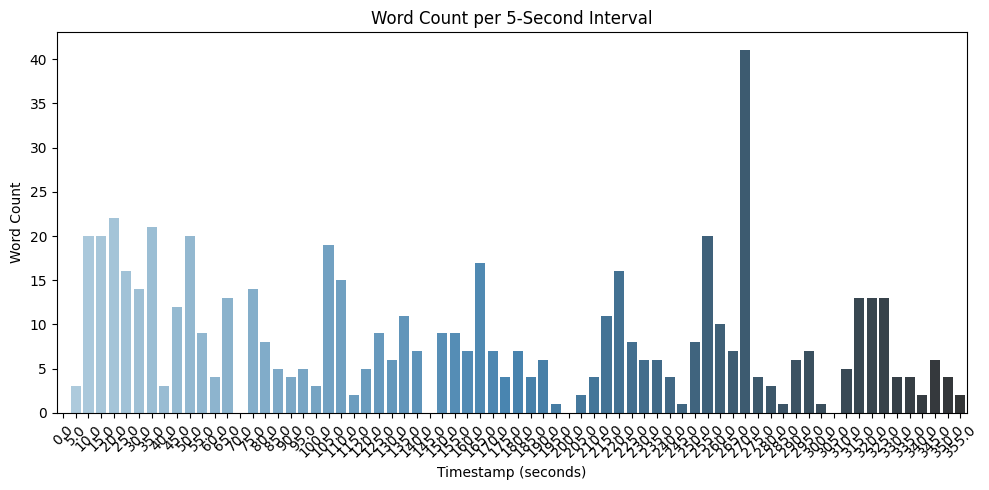

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Experimenter_CREW_999_1_All_1731617801_93da9b83ed9240f280231c7a10add1a0.csv')

df["transcription"] = df["transcription"].fillna("").astype(str)
df["word_count"] = df["transcription"].apply(lambda x: len(x.split()))

histogram_data = df.groupby("timestamp")["word_count"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=histogram_data, x="timestamp", y="word_count", palette="Blues_d")
plt.title("Word Count per 5-Second Interval")
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Word Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-5-dbd9ea63a5b1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=sentiment_counts, x="Sentiment", y="Percentage", palette="pastel")


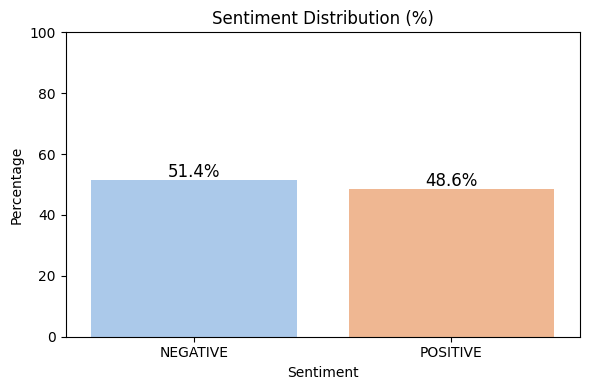

In [5]:
# Prepare sentiment distribution data (count and percentage)
sentiment_counts = df["sentiment"].value_counts().reset_index()
sentiment_counts.columns = ["Sentiment", "Count"]
sentiment_counts["Percentage"] = (sentiment_counts["Count"] / sentiment_counts["Count"].sum()) * 100

# Plot 2: Sentiment Distribution Bar Chart with Percentage Labels
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=sentiment_counts, x="Sentiment", y="Percentage", palette="pastel")

# Add percentage labels on top of each bar
for i, row in sentiment_counts.iterrows():
    ax.text(i, row["Percentage"] + 1, f"{row['Percentage']:.1f}%", ha="center", fontsize=12)

plt.title("Sentiment Distribution (%)")
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


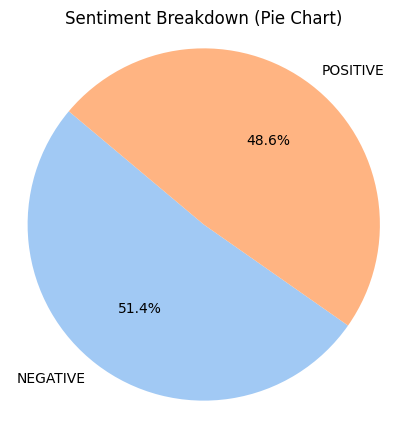

In [7]:
sentiment_counts = df["sentiment"].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Sentiment Breakdown (Pie Chart)")
plt.axis("equal")
plt.show()


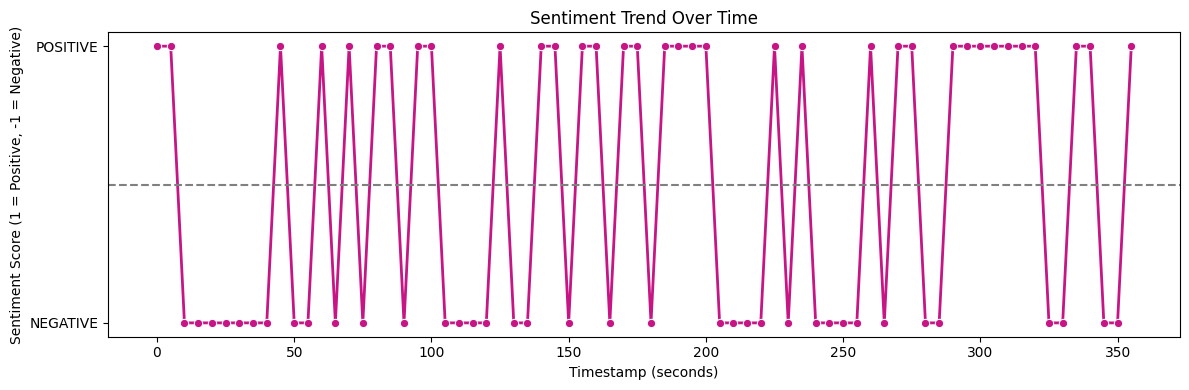

In [6]:
# Plot 3: Sentiment Over Time (Line Plot with Score Mapping)
# Map sentiments to numerical values for plotting
df["sentiment_score"] = df["sentiment"].map({"POSITIVE": 1, "NEGATIVE": -1})

plt.figure(figsize=(12, 4))
sns.lineplot(data=df, x="timestamp", y="sentiment_score", marker="o", linewidth=2, color="mediumvioletred")
plt.axhline(0, color='gray', linestyle='--')
plt.title("Sentiment Trend Over Time")
plt.xlabel("Timestamp (seconds)")
plt.ylabel("Sentiment Score (1 = Positive, -1 = Negative)")
plt.yticks([-1, 1], ["NEGATIVE", "POSITIVE"])
plt.tight_layout()
plt.show()


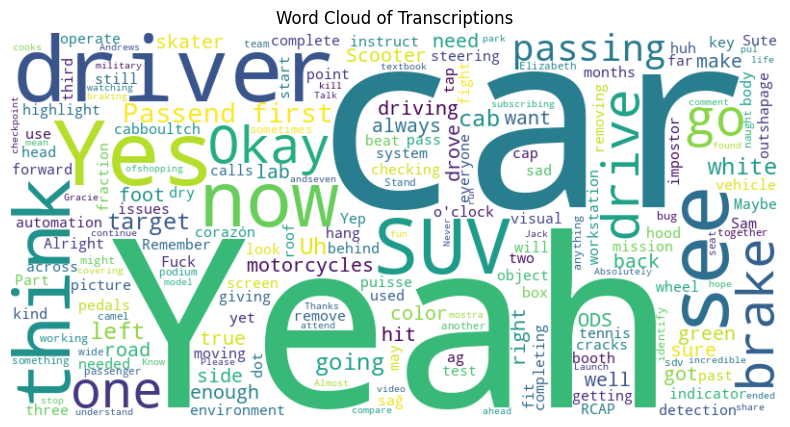

In [8]:
from wordcloud import WordCloud

all_text = " ".join(df["transcription"].fillna("").astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Transcriptions")
plt.show()
